In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Acquire data

In [28]:
import pandas as pd


In [29]:
train_df = pd.read_csv("./titanic/train.csv")
test_df = pd.read_csv("./titanic/test.csv")
combine = [train_df, test_df]

In [19]:
# Mr 성씨를 가진 사람의 평균나이 -> 29세 , 각 클래스별 평균나이 +평균나이
train_df[train_df.Name.str.contains('Miss')]['Age'].mean()

29.69911764705882

In [21]:
# Pclass 3 -> 25세
train_df[train_df.Pclass ==3]['Age'].mean()

25.14061971830986

In [22]:
# 자손이 없는 사람의 평균나이 -> 31세
train_df[train_df.SibSp ==0]['Age'].mean()

31.39755838641189

In [23]:
train_df[train_df.Parch ==0]['Age'].mean()

32.17850287907869

In [ ]:
train_df[train_df.Embarked =='S']['Age'].mean()

In [74]:
train_df.groupby(['Survived','Pclass'],as_index=False).count()

,Survived,Pclass,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,80,80,80,64,80,80,80,80,59,80
1,0,2,97,97,97,90,97,97,97,97,3,97
2,0,3,372,372,372,270,372,372,372,372,6,372
3,1,1,136,136,136,122,136,136,136,136,117,134
4,1,2,87,87,87,83,87,87,87,87,13,87
5,1,3,119,119,119,85,119,119,119,119,6,119


In [79]:
train_df[train_df.Survived ==0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [80]:
train_df[train_df.Survived ==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [84]:
# 연속형 변수는 age ? 이산 변수뿐
# Survived 와 Fare와의 상관관계

train_df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [182]:
for row in train_df.groupby(['Pclass','SibSp']).count()[['PassengerId']].itertuples():
    print(row)
    break

Pandas(Index=(1, 0), PassengerId=137)


In [ ]:
for row in train_df.groupby(['Pclass','SibSp']).count()[['PassengerId']].iterrows():
    print(row[1].values[0])

In [177]:
grp_df = train_df.groupby(['Pclass','SibSp']).count()[['PassengerId']]

PassengerId
Pclass SibSp             
1      0              137
       1               71
       2                5
       3                3
2      0              120
       1               55
       2                8
       3                1
3      0              351
       1               83
       2               15
       3               12
       4               18
       5                5
       8                7

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
2 3
2 4
2 5


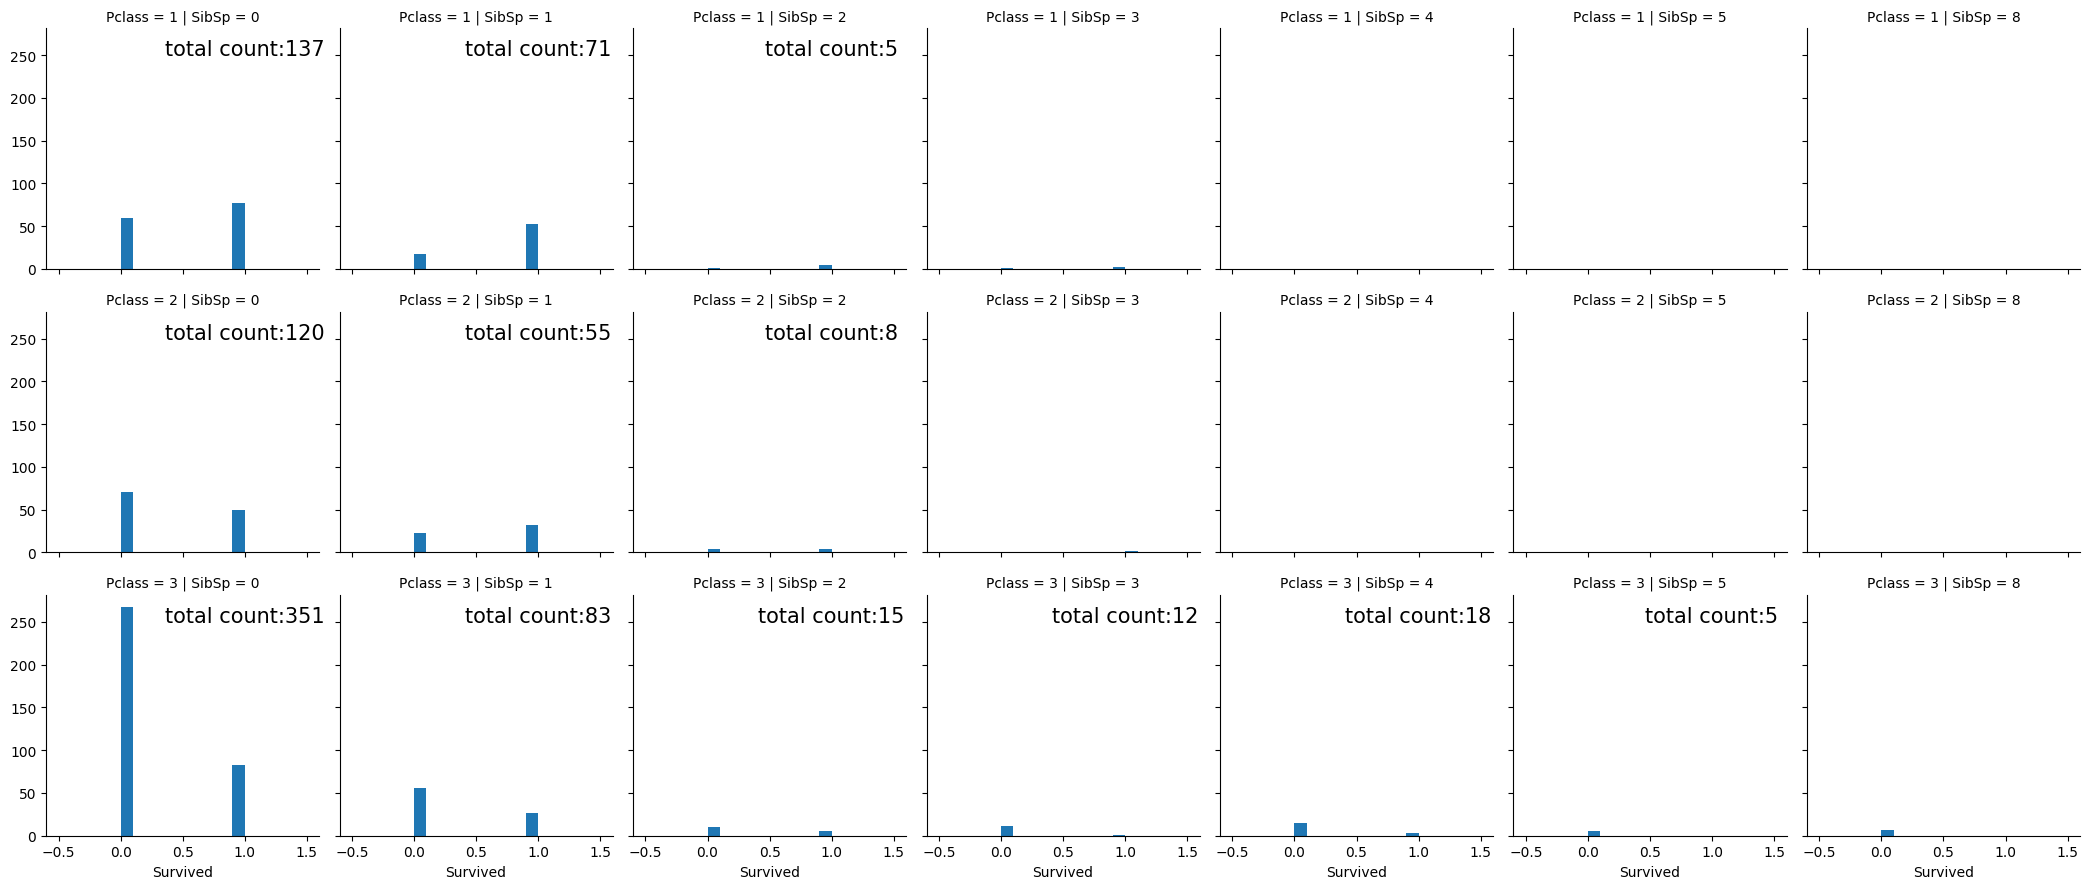

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
grid = sns.FacetGrid(train_df, row='Pclass',col='SibSp')
grid.map(plt.hist, 'Survived')
# grid.axes[0][0].text(2022)
for idx in range(grp_df.idxmax()[0][0]):
    j = 0
    j_max = len(grp_df.loc[(idx+1,)])-1
    for ax in grid.axes[idx]:
        # ax.set_xlim(0.0)
        #print(idx)
        #grp_df.loc[(1,0)].values[0]
        # j_max = len(grp_df.loc[(idx+1,)])

        if j == j_max:
            continue
        print(idx,j)
        val = grp_df.loc[(idx+1,j )].values[0]
        ax.text(1,250,f'total count:{val}',horizontalalignment='center',size=15)
        j+=1
        # j_max +=1
# 순서가 아니고 다르게 했어야하나
 #

In [304]:
grp_df

PassengerId
Pclass SibSp             
1      0              137
       1               71
       2                5
       3                3
2      0              120
       1               55
       2                8
       3                1
3      0              351
       1               83
       2               15
       3               12
       4               18
       5                5
       8                7

137

In [ ]:
grp_df

3

In [ ]:
grp_df

In [ ]:
groupKey = ['Pclass','SibSp']

In [224]:
grp_df.sort_index()

PassengerId
Pclass SibSp             
1      0              137
       1               71
       2                5
       3                3
2      0              120
       1               55
       2                8
       3                1
3      0              351
       1               83
       2               15
       3               12
       4               18
       5                5
       8                7

In [225]:
grp_df['Pclass']

KeyError: 'Pclass'

137
71
5
3


In [236]:
grp_df

PassengerId
Pclass SibSp             
1      0              137
       1               71
       2                5
       3                3
2      0              120
       1               55
       2                8
       3                1
3      0              351
       1               83
       2               15
       3               12
       4               18
       5                5
       8                7

In [ ]:
groupKey

In [ ]:
grp_df[grp_df.index.Pclass ==1]

In [ ]:
for row in train_df.groupby(['Pclass','SibSp']).count()[['PassengerId']].iterrows():
    print(row)

In [ ]:
ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

<AxesSubplot:title={'center':'Pclass = 1 | SibSp = 0'}>

In [ ]:
fig,ax = plt.subplots((3,2),figsize=(15,15))
# 형제 배우자가 없는 pclass 3은 생존율이 현저히 낮다
# 근데 pclass가 높으면 없더라도 생존율은 높다
# 각 count를 통해 비율 살피기

In [138]:
train_df.groupby(['Pclass','SibSp']).count()['PassengerId']

Pclass  SibSp
1       0        137
        1         71
        2          5
        3          3
2       0        120
        1         55
        2          8
        3          1
3       0        351
        1         83
        2         15
        3         12
        4         18
        5          5
        8          7
Name: PassengerId, dtype: int64

In [149]:
grid.axes[0][0]

<AxesSubplot:title={'center':'Pclass = 1 | SibSp = 0'}>

In [ ]:
plt.show()

In [139]:
fig, axs = plt.subplots(grid)

ValueError: Number of rows must be a positive integer, not <seaborn.axisgrid.FacetGrid object at 0x000002D915AE87C8>

<Figure size 640x480 with 0 Axes>

TypeError: _get_palette() missing 4 required positional arguments: 'data', 'hue', 'hue_order', and 'palette'

In [131]:
grid.axes[0][0]

<AxesSubplot:title={'center':'Pclass = 1 | SibSp = 0'}>

In [ ]:
# dataframe dtypes 가 float이 되기 때문에 1의 str length도 3이 나온
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
import numpy as np
len(str(np.float(1)))
len(str(1))
len(str(2.12))
df.applymap(lambda x: len(str(x)))

In [63]:
df.dtypes

# row의 각 컬럼을 받아서 컬럼별로 특징 보기

0    float64
1    float64
dtype: object

In [ ]:
train_df

In [18]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df[train_df.Pclass]


In [ ]:
train_df['Fare'].mean()

In [ ]:
print(train_df.columns.values)

In [5]:
# 체크해야 할 사항 automl 시
# which features are mixed data types?
# which features may contain errors or typos?


# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()
# which features contain blank, null or empty values?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:

# what is the distribution of numertical feature valeus across the samples?

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rouse, Mr. Richard Henry",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:

train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)



,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
# as_index = > groupby columns을 index로 사용?
train_df[["Parch",'Survived']].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


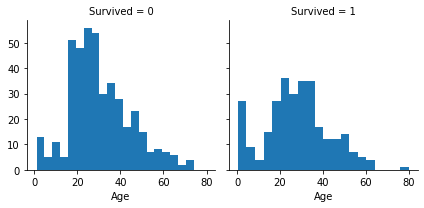

In [15]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age',bins=20)

In [16]:
# FacetGrid method 는
# axes의 가로 길이가 col의  unique 길이가 되고
# axes의 세로 길이가 row의 unique value 길이가 되서 조합하여 나오는 결과
# 를 hist를 넣으면,'Age'에 대한 row col 조합의 histogram을 나타낸다

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


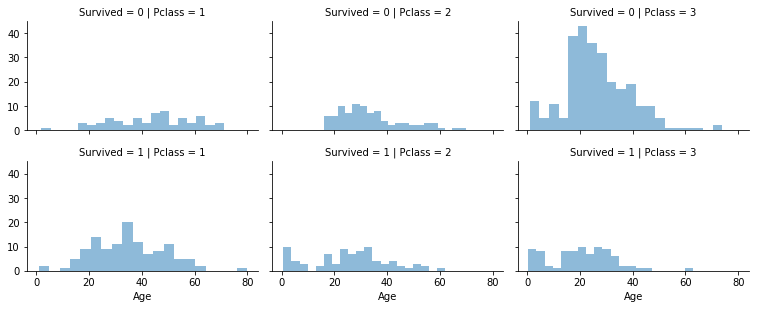

In [17]:
# grid = sns.FacetGrid(train_df, col='Pclass',hue='Survived')
# facetgrid 의 row col 은 조합으로 활용한다
#
grid = sns.FacetGrid(train_df, col='Pclass',row='Survived',size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5,bins=20)
grid.add_legend();

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


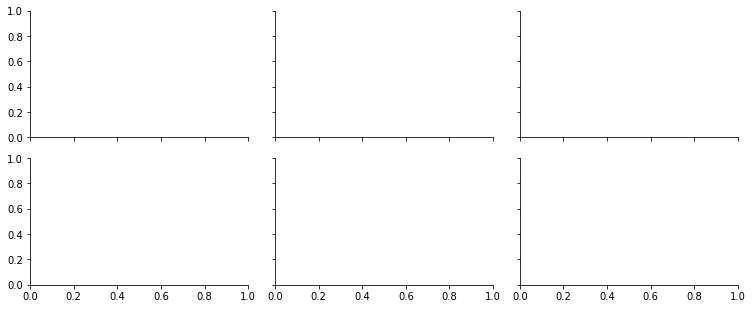

In [26]:
sns.FacetGrid(train_df, col='Pclass',row='Survived',size=2.2,aspect=1.6)

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


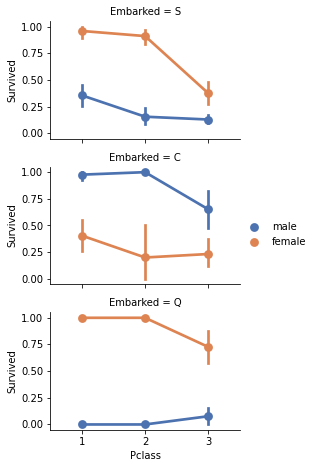

In [27]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2,aspect=1.6)
# pointplot의 argument pclass = col , survived = col , sex = hue
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep')
grid.add_legend()

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


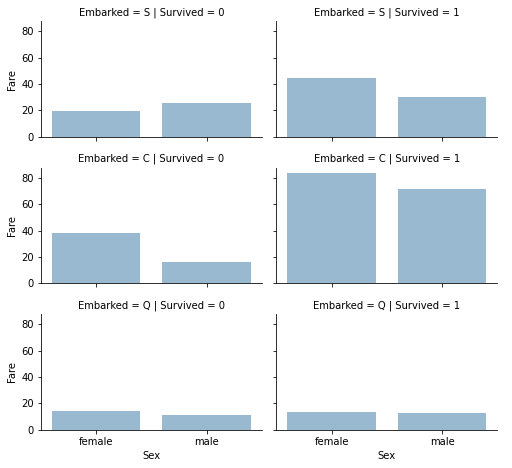

In [28]:
#
grid = sns.FacetGrid(train_df, row='Embarked' , col='Survived', size=2.2,aspect=1.6)
grid.map(sns.barplot , 'Sex' , 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [30]:
print("Before" , train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [31]:
# correcting by dropping features

train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine =[train_df, test_df ]


In [32]:
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [ ]:
# creating new feature

In [34]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
# 빈도표 생성
pd.crosstab(train_df['Title'], train_df['Sex'])

In [37]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady','Countess','Capt','Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Dona'], 'Rare')

In [ ]:
dataset[dataset['Title'] == 'Rare']['Title']

In [42]:
dataset['Title'] = dataset['Title'].replace('Mlle','Miss')


In [44]:
dataset['Title'] = dataset['Title'].replace('Ms',',Miss')

In [45]:
dataset['Title'] = dataset['Title'].replace("Mme","Mrs")

In [46]:
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mlle,1.000000
3,Mme,1.000000
4,Mr,0.156673
5,Mrs,0.792000
6,Ms,1.000000
7,Rare,0.347826


In [47]:
title_mapping ={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

In [49]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

In [50]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [51]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(["Name"],axis=1)
combine = [train_df, test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [52]:

# cConverting categorical feature

for dataset in combine:
    dataset["Sex"] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

In [53]:

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


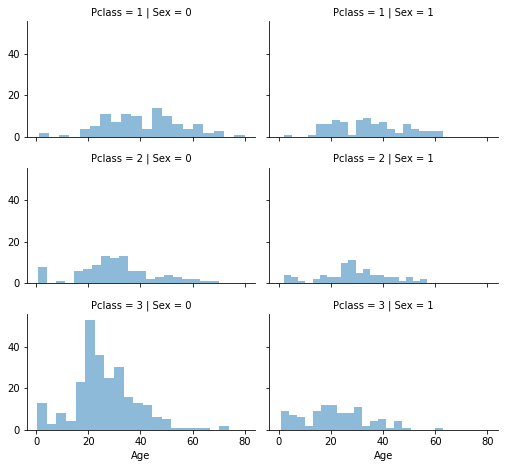

In [56]:
# grid = sns.FacetGrid(train_df, col="Pclass", hue="Gender")
grid = sns.FacetGrid(train_df, row="Pclass",col="Sex", size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [57]:

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

22.0

In [ ]:
guess_ages

In [64]:
# 조합별로 중위값을 찾아서 나이를 추측하는 것이다

for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset["Sex"] ==i) &\
                               (dataset['Pclass'] ==j+1)]['Age'].dropna()
            age_guess = guess_df.median()

            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5


    # 추측한 나이( 중위값을 null 값에 넣는다)
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex ==i) & (dataset.Pclass == j+1),\
                'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

In [65]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


In [68]:
# cut - 동일 길이로 cut
train_df['AgeBand'] = pd.cut(train_df['Age'],5 )
# as_index를 통해 reset_index를 하지않아도된다

In [69]:
train_df['AgeBand']

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: AgeBand, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [75]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1.0,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,S,5.0,"(16.0, 32.0]"
887,1,1,1,19,0,0,30.0000,S,2.0,"(16.0, 32.0]"
888,0,3,1,21,1,2,23.4500,S,2.0,"(16.0, 32.0]"
889,1,1,0,26,0,0,30.0000,C,1.0,"(16.0, 32.0]"


In [ ]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

In [70]:
#train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean()

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [74]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean().sort_values(by='AgeBand',ascending=True)

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [77]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age'] = 0
    dataset.loc[(dataset['Age']> 16) &(dataset['Age']<=32),'Age']= 1
    dataset.loc[(dataset['Age']> 32) &(dataset['Age'] <=48),'Age']=2
    dataset.loc[(dataset['Age']>48) &(dataset['Age']<=64),'Age']= 3
    dataset.loc[dataset['Age']>64,'Age']
train_df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,0,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,0,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,0,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,0,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,0,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [78]:
train_df = train_df.drop(['AgeBand'],axis=1)
combine= [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0,1,0,7.2500,S,1.0
1,1,1,1,0,1,0,71.2833,C,3.0
2,1,3,1,0,0,0,7.9250,S,2.0
3,1,1,1,0,1,0,53.1000,S,3.0
4,0,3,0,0,0,0,8.0500,S,1.0


In [81]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1

train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [83]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1

train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [84]:

train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,0,7.2500,S,1.0,0
1,1,1,1,0,71.2833,C,3.0,0
2,1,3,1,0,7.9250,S,2.0,1
3,1,1,1,0,53.1000,S,3.0,0
4,0,3,0,0,8.0500,S,1.0,1


In [85]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [86]:
train_df.loc[:, ['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,0,0,3
1,0,0,1
2,0,0,3
3,0,0,1
4,0,0,3
5,0,0,3
6,0,0,1
7,0,0,3
8,0,0,3
9,0,0,2


In [87]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [88]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [90]:
# mode : 최빈

.Embarked.dropna().mode()

0    S
dtype: object

In [2]:
train_df

NameError: name 'train_df' is not defined